In [155]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt 
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'Model.log',force = True)
# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, accuracy_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Multicolinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [156]:
pd.set_option("Display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [157]:
logging.info("Data loading started...")

In [158]:
url = "https://raw.githubusercontent.com/Digraskarpratik/CODEB_Internship/refs/heads/main/dataset_phishing.csv"

df = pd.read_csv(url)
df.sample(frac=1) # Data Shuffle


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
7867,https://www.visual-paradigm.com/features/datab...,72,23,0,2,5,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,1,0,0,0,0,0,9,4,3,3,3,8,8,8,5.666667,5.666667,5.666667,0,0,0,0,0,0,120,0.950000,0.050000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.0,0.0,0,0,0,72.727273,0,0,0,1,1,0,1780,6986,11508,0,0,5,legitimate
495,https://woodplc-com-dot-gl494903049.wl.r.appsp...,53,44,1,4,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0.169811,0.204545,0,0,0,1,0,3,0,0,1,0,0,0,7,2,1,1,0,11,11,0,4.857143,4.857143,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.000000,0,0,1,1,0,0,217,5627,0,0,1,5,phishing
2435,http://cbjets.com/rsnn/ccsm.html,32,10,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,2,4,6,4,6,6,4,4.500000,6.000000,4.000000,0,0,0,0,0,0,19,0.842105,0.157895,0,1,0,0.000000,0,0.000000,0,1,80.000000,0,100.0,0.0,0,0,0,100.000000,0,0,0,1,0,0,101,8664,7107162,0,1,2,phishing
10843,http://researchbank.rmit.edu.au/view/rmit:3755,46,24,0,3,0,0,0,0,0,0,0,0,0,4,0,2,0,0,0,0,0,0,0,0,1,0.086957,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,5,1,4,4,4,12,12,4,5.600000,8.000000,4.000000,1,0,0,0,0,0,60,0.816667,0.183333,0,0,0,0.636364,0,0.181818,0,1,89.473684,0,100.0,0.0,0,0,0,27.272727,0,0,0,0,1,1,0,-1,8828,0,0,5,legitimate
6018,http://terrehautedivorcelawyer.com/EPAY/NOTEPU...,72,27,0,1,0,0,0,0,0,0,1,0,0,9,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,8,1,2,23,2,23,23,8,6.625000,23.000000,4.285714,0,0,0,0,0,0,13,0.846154,0.153846,0,0,0,0.000000,0,0.000000,0,0,60.000000,0,100.0,0.0,0,0,0,0.000000,0,0,0,1,0,0,299,431,8509505,0,1,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,https://www.arenait.net/,24,15,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,2,3,3,3,0,7,7,0,5.000000,5.000000,0.000000,0,0,0,0,0,0,143,0.370629,0.629371,0,4,0,0.044444,0,0.000000,0,1,48.979592,0,0.0,100.0,0,0,0,58.620690,0,0,0,1,1,0,134,4979,0,0,0,4,legitimate
7166,https://9khnh.app.link/gbS5LA5Lz2?Ssdf45sdf21,45,14,0,2,0,0,1,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.177778,0.071429,0,0,0,0,0,2,0,0,0,0,0,0,4,2,3,3,10,11,5,11,7.250000,4.000000,10.500000,0,0,0,0,1,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.000000,0,0,1,1,0,0,2429,1953,4365,0,1,3,phishing
4265,http://pizzafactory.co.il/wp-content/themes/sc...,89,18,0,3,1,0,1,0,0,1,1,0,0,8,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,1,0,0,0,0,0,12

In [159]:

# Creating Our First Log
logging.info('Dataset Imported Successfully For Model Building...')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [161]:
Number = df.select_dtypes(exclude="object")
character = df.select_dtypes(include="object")

In [162]:
df.drop(["url"], axis=1, inplace=True)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

## Data is Balanced so we dont want to use smote technique

In [164]:
le = LabelEncoder()

df ["status"] = LabelEncoder().fit_transform(df["status"])

In [165]:
df["status"].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

In [166]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            "Median" : df[col].median(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
# report

report.style.background_gradient(subset=["Minimum", "Maximum", "Mean", "Median", "Mode", "25%", "75%", "IQR", "Standard Deviation", "Skewness", "Kurtosis"], cmap= "coolwarm")

,Feature,Minimum,Maximum,Mean,Median,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,length_url,12.000000,1641.000000,61.126684,47.000000,26.000000,33.000000,71.000000,38.000000,55.297318,8.085190,144.196391,Has Outliers
1,length_hostname,4.000000,214.000000,21.090289,19.000000,16.000000,15.000000,24.000000,9.000000,10.777171,5.160078,69.829931,Has Outliers
2,ip,0.000000,1.000000,0.150569,0.000000,0.000000,0.000000,0.000000,0.000000,0.357644,1.954418,1.820067,Has Outliers
3,nb_dots,1.000000,24.000000,2.480752,2.000000,2.000000,2.000000,3.000000,1.000000,1.369686,5.718117,66.155843,Has Outliers
4,nb_hyphens,0.000000,43.000000,0.997550,0.000000,0.000000,0.000000,1.000000,1.000000,2.087087,4.695239,40.696686,Has Outliers
5,nb_at,0.000000,4.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.155500,8.272893,95.457038,Has Outliers
6,nb_qm,0.000000,3.000000,0.141207,0.000000,0.000000,0.000000,0.000000,0.000000,0.364456,2.488737,6.060591,Has Outliers
7,nb_and,0.000000,19.000000,0.162292,0.000000,0.000000,0.000000,0.000000,0.000000,0.821337,9.725295,139.140959,Has Outliers
8,nb_or,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,No Outliers
9,nb_eq,0.000000,19.000000,0.293176,0.000000,0.000000,0.000000,0.000000,0.000000,0.998317,6.530036,70.909580,Has Outliers


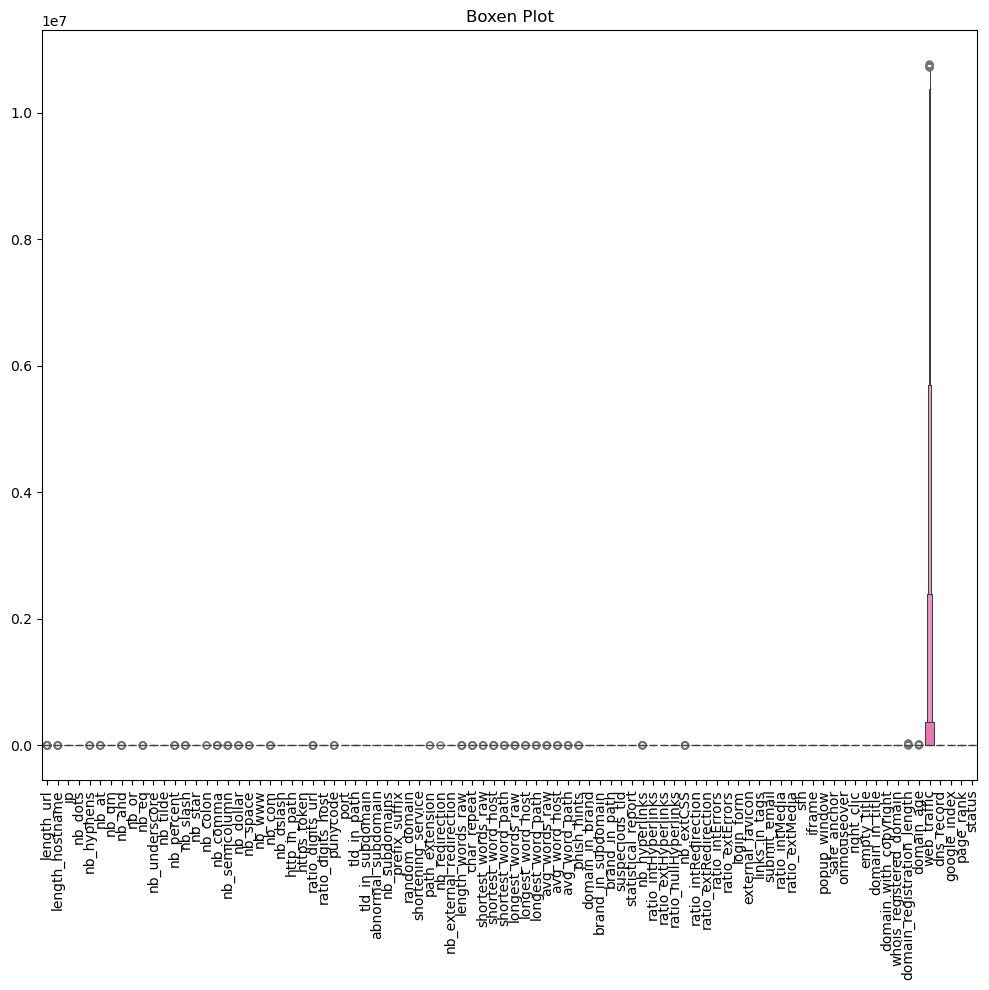

In [167]:
plt.figure(figsize=(10,10))
sns.boxenplot(data=df)
plt.xticks(rotation = 90)
plt.title("Boxen Plot")
plt.tight_layout()
plt.show()

In [168]:
# Replace Outlier with median Stategy 

for col in df.select_dtypes(include="number").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # identify Outlier
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()
    
    if outlier_count > 0 :
        replacement = df[col].median()
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else :
        print(f"No outliers found in '{col}'.")
        

Replaced 620 outliers in 'length_url' with median.
Replaced 775 outliers in 'length_hostname' with median.
Replaced 1721 outliers in 'ip' with median.
Replaced 567 outliers in 'nb_dots' with median.
Replaced 1371 outliers in 'nb_hyphens' with median.
Replaced 245 outliers in 'nb_at' with median.
Replaced 1555 outliers in 'nb_qm' with median.
Replaced 761 outliers in 'nb_and' with median.
No outliers found in 'nb_or'.
Replaced 1564 outliers in 'nb_eq' with median.
Replaced 1695 outliers in 'nb_underscore' with median.
Replaced 76 outliers in 'nb_tilde' with median.
Replaced 355 outliers in 'nb_percent' with median.
Replaced 401 outliers in 'nb_slash' with median.
Replaced 8 outliers in 'nb_star' with median.
Replaced 197 outliers in 'nb_colon' with median.
Replaced 24 outliers in 'nb_comma' with median.
Replaced 248 outliers in 'nb_semicolumn' with median.
Replaced 11 outliers in 'nb_dollar' with median.
Replaced 210 outliers in 'nb_space' with median.
No outliers found in 'nb_www'.
Rep

In [169]:
# Creating Our First Log
logging.info('Outlier Detection and Replacing of Outlier Activity Done Using IQR Method.')

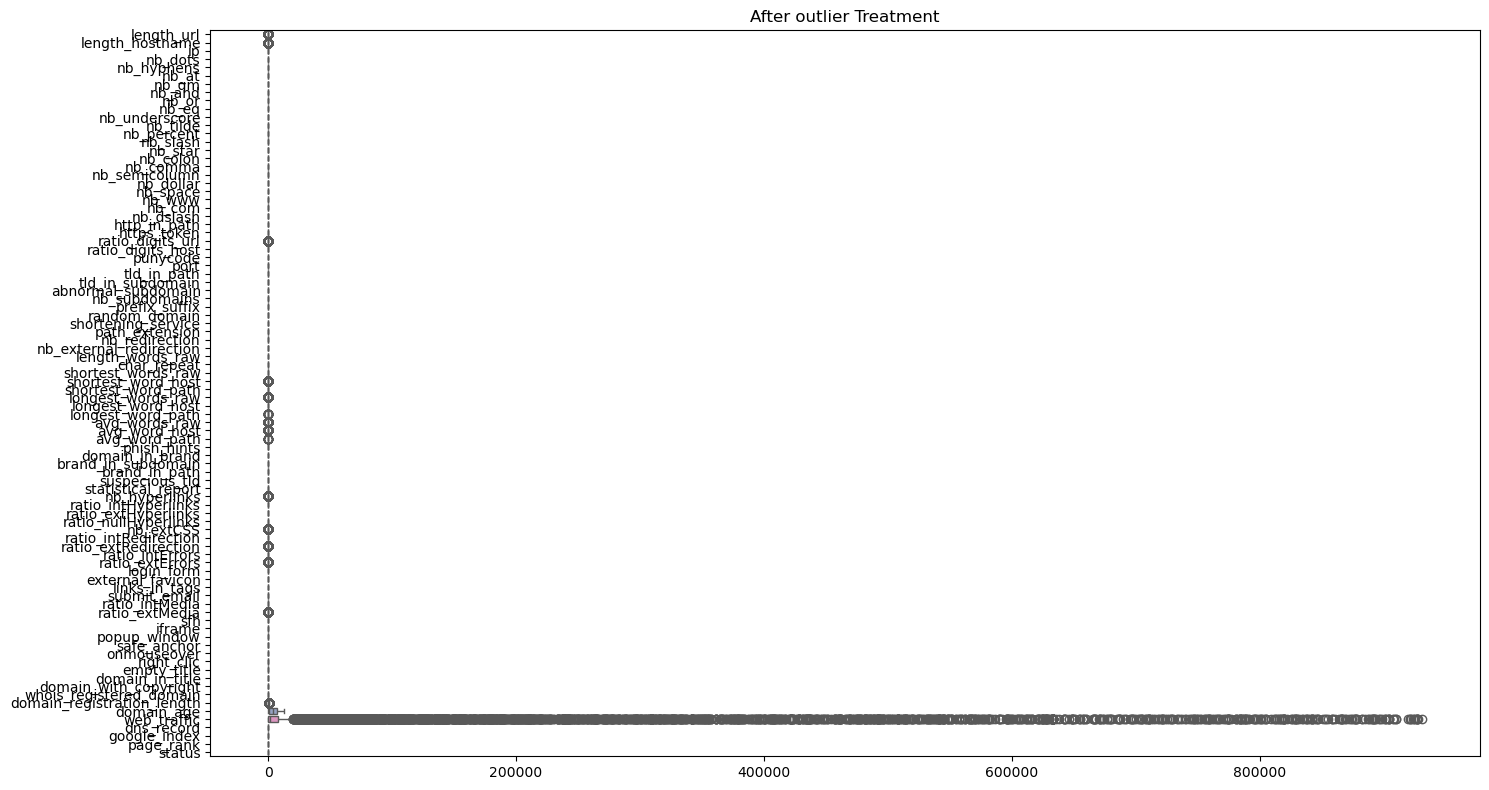

In [170]:
plt.figure(figsize=(15, 8))

# Create Boxplot for all numerical columns
sns.boxplot(data = df, orient="h", palette = "Set2")

# Set Title
plt.title("After outlier Treatment")
plt.tight_layout()
plt.show()

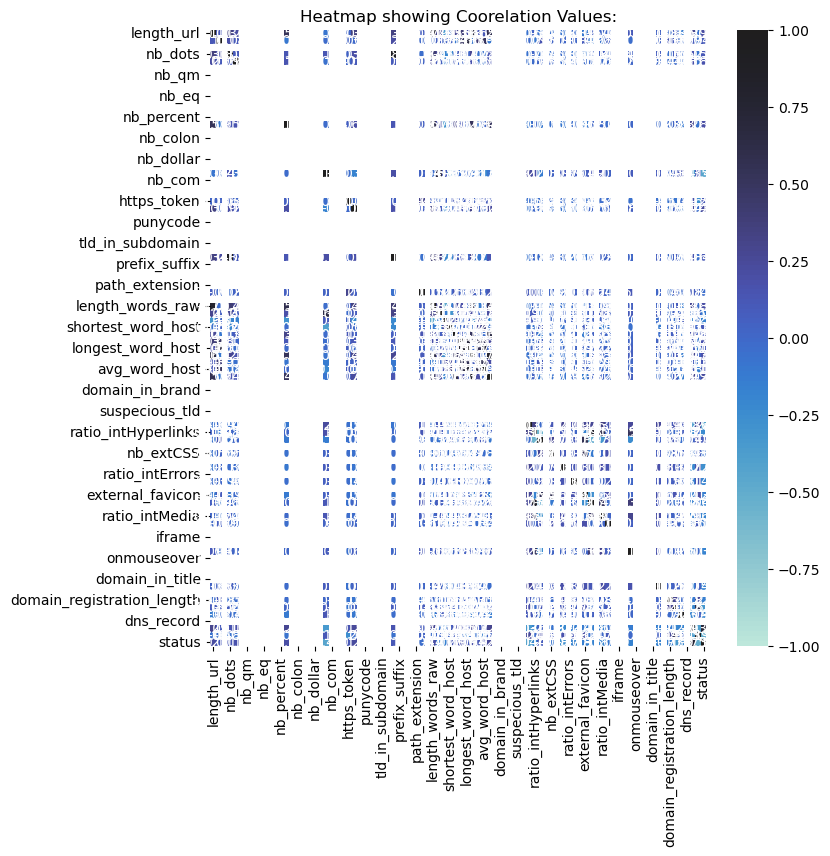

In [171]:
corr = df.corr()
df.ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr,annot = True,center = True,vmax= 1,vmin = -1)
plt.title('Heatmap showing Coorelation Values:')
plt.show()

In [172]:
df.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [173]:
def calculate_vif(dataset):
    vif= pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Values"] = [variance_inflation_factor(dataset.values, i) for i in range (dataset.shape[1])]
    vif["VIF_Values"] = round(vif["VIF_Values"], 2)
    vif = vif.sort_values(by = "VIF_Values", ascending=False)
    return (vif)

calculate_vif(df.drop(["status"], axis=1))

,features,VIF_Values
46,longest_word_path,5.86
32,nb_subdomains,5.33
45,longest_word_host,5.18
3,nb_dots,4.86
57,ratio_intHyperlinks,4.49
44,longest_words_raw,4.37
49,avg_word_path,4.16
39,length_words_raw,4.08
0,length_url,3.81
48,avg_word_host,3.44


In [174]:
# Creating Our First Log 
logging.info("Correlation Matrix Plotted and PCA Technique Started....")

In [180]:
# Using PCA Concept
#Step1 : Standard the data

scalerRS = RobustScaler()
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


X_train = scalerRS.fit_transform(df)

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio: ", evr)
print("Number of Components selected:", pcs)

# step 3: apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_train)

# step 4 : Create DataFrame

pca_columns = [f"PC {j+1}" for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns = pca_columns)

# Step 5 : join Target Columns with PCA:
pca_df = pca_df.join(df["status"], how = "left") 
pca_df


# step 2 : Determine number of components to retain 90% variance

Explained Variance Ratio:  [0.57073284 0.97139911]
Number of Components selected: 2


,PC 1,PC 2,status
0,-7.872612,-5.366577,0
1,-6.309982,14.559808,1
2,-7.737977,-5.396860,1
3,5.912038,-2.884364,0
4,-6.772642,-5.403418,0
...,...,...,...
11425,-1.095113,73.295865,0
11426,-7.900709,-5.380686,1
11427,-7.914450,-5.343483,0
11428,-7.664626,-5.369294,0


In [ ]:
# Creating Our First Log
logging.info("Model Building Started......")

In [201]:
# Model Building

def split_data(data, tcol, testSize=0.2, randomState=42):
    X = data.drop(tcol, axis =1)
    y = data[tcol]
    return train_test_split(X, y, test_size= testSize, random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train, X_test, y_train, y_test = split_data(data, t_col)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = [model_name, accuracy]
    return result

model_builder(model_name= "RandomForestClassifier", model=RandomForestClassifier(), data=pca_df, t_col = "status")
# print (result)




['RandomForestClassifier', 0.8460192475940508]

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def split_data(data, tcol, testSize=0.2, randomState=42):
    X = data.drop(tcol, axis=1)
    y = data[tcol]
    return train_test_split(X, y, test_size=testSize, random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train, X_test, y_train, y_test = split_data(data, t_col)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result = [model_name, accuracy]
    return result

# Example usage:
result = model_builder(
    model_name="RandomForestClassifier",
    model=RandomForestClassifier(),
    data=pca_df,
    t_col="status"
)

print(result)


['RandomForestClassifier', 0.847331583552056]


In [188]:
# train
X = pca_df.drop(["status"], axis=1)
y = pca_df["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

y_pred_RFC = RFC.predict(X_test)
accuracy_score_RF = accuracy_score(y_test, y_pred_RFC)

print(f"accuracy Score for Random Forest: {(accuracy_score_RF)}%")

accuracy Score for Random Forest: 0.8455818022747157%
